# TP4

## Importation de paquets et de modules Python

In [1]:
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import textcleaner as tc
from stop_words import get_stop_words
from nltk.probability import FreqDist
import langid
import pycountry
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Création d'un corpus

### Récupération de nos documents à partir du dossier txt

In [2]:
root = '../../data/corpus/txt'
corpus = '../../data/corpus'
temp_path = '../../data/corpus/tmp'

txts = os.listdir(root)
files = sorted(txts)

print(f"Nous avons récupéré {len(files)} fichiers de la bibliothèque numérique CAMille.")

Nous avons récupéré 1000 fichiers de la bibliothèque numérique CAMille.


#### Nous vérifions si nos documents sont francophones

In [3]:
langid.set_languages(['fr', 'nl'])

limit = None

lang_dict = defaultdict(int)
txts = txts[:limit] if limit else txts

for i, txt in enumerate(files):
    if txt.endswith("txt"):
        if i % 50 == 0:
            print(f'{i} document(s) processed...')
        text = open(os.path.join(root, txt)).read()
        text_length = len(text)
        if text_length > 20:
            lang, conf = langid.classify(text)
            lang_dict[lang] += 1
        else:
            print(f"{txt} contains only {text_length} characters, treating as unknown")
            lang_dict['n/a'] += 1
print("Done")

for lang_code, nb_docs in lang_dict.items():
    language = pycountry.languages.get(alpha_2=lang_code)
    try:
        lang_name = language.name
    except AttributeError:
        lang_name = language
    print(f"{lang_name}\t{nb_docs}")

0 document(s) processed...
50 document(s) processed...
100 document(s) processed...
150 document(s) processed...
200 document(s) processed...
250 document(s) processed...
300 document(s) processed...
350 document(s) processed...
400 document(s) processed...
450 document(s) processed...
500 document(s) processed...
550 document(s) processed...
600 document(s) processed...
650 document(s) processed...
700 document(s) processed...
750 document(s) processed...
800 document(s) processed...
850 document(s) processed...
900 document(s) processed...
950 document(s) processed...
Done
French	1000


### Quelques statistiques

In [4]:
all_years = [str(year) for year in range(1885, 1908)]

count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
        elems = f.split("_")
        newspaper = elems[1]
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        month = int(elems[2].split("-")[1])
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1

In [5]:
print("Voici le nombre de documents que l'on a récupéré par journal :")
print(f"- {count_newspapers['JB729']} exemplaires de Le Vingtième Siècle")
print(f"- {count_newspapers['JB555']} exemplaires de L'Indépendance belge")
print(f"- {count_newspapers['JB427']} exemplaires de La Libre Belgique")
print(f"- {count_newspapers['JB427']} exemplaires de La Libre Belgique")
print(f"- {count_newspapers['JB421']} exemplaires de L'Avenir du Luxembourg")
print(f"- {count_newspapers['JB773']} exemplaires de Vers l'Avenir")
print(f"- {count_newspapers['JB685']} exemplaires de Le Petit Bleu")
print(f"- {count_newspapers['JB567']} exemplaires de Journal de Bruxelles")
print(f"- {count_newspapers['JB838']} exemplaires du journal Le Soir")
print(f"- {count_newspapers['JB555A']} exemplaires de L'Indépendance belge (édité en Angleterre)")
print(f"- {count_newspapers['JB638']} exemplaires de La Meuse")
print(f"- {count_newspapers['JB837']} exemplaires de Le Peuple")
print(f"- {count_newspapers['JB1051']} exemplaires de Le Drapeau rouge")
print(f"- {count_newspapers['JB572']} exemplaires de Journal de Charleroi")

Voici le nombre de documents que l'on a récupéré par journal :
- 138 exemplaires de Le Vingtième Siècle
- 215 exemplaires de L'Indépendance belge
- 0 exemplaires de La Libre Belgique
- 0 exemplaires de La Libre Belgique
- 21 exemplaires de L'Avenir du Luxembourg
- 0 exemplaires de Vers l'Avenir
- 81 exemplaires de Le Petit Bleu
- 154 exemplaires de Journal de Bruxelles
- 88 exemplaires du journal Le Soir
- 0 exemplaires de L'Indépendance belge (édité en Angleterre)
- 186 exemplaires de La Meuse
- 69 exemplaires de Le Peuple
- 0 exemplaires de Le Drapeau rouge
- 48 exemplaires de Journal de Charleroi


In [6]:
missing_years = [y for y in all_years if y not in covered_years]

print(f"Les années manquantes de notre corpus sont: {', '.join(missing_years)}")

Les années manquantes de notre corpus sont: 


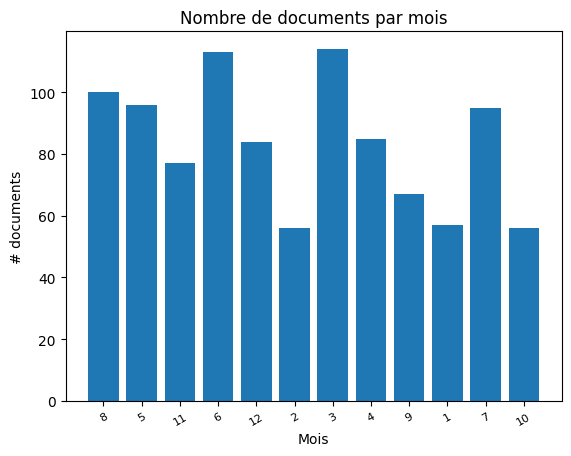

In [7]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

### Création d'un grand fichier corpus.txt comprenant tous les documents

In [8]:
!cat ../../data/corpus/txt/*.txt > ../../data/corpus/corpus.txt
!wc ../../data/corpus/corpus.txt

print("On obtient ici, dans l'ordre, le nombre de lignes, de mots, et d'octets compris dans notre corpus.")


       0  6093440 37775986 ../../data/corpus/corpus.txt
On obtient ici, dans l'ordre, le nombre de lignes, de mots, et d'octets compris dans notre corpus.


### Récupération de notre fichier corpus.txt

In [9]:
corpus = "../../data/corpus/corpus.txt"
with open(corpus) as f:
    text = f.read()
    
print(text[:600])

3 duN ' Le coin des poètes. I_e spir au hameau. St-Lfeer, 23 août. E. LAMBERT. -Waudrii de VA venir du — du Dimanche 27 Août 189? Les gamins en criant font rouler des cerceaux. LVbas, un char de foin rentre dans une grange. Do ouvrier suant' fend du bois qu'il arrange En tas; près d'un fumier où grognent des po arceaux. Voici la ménagère allant avec deux seaux À la pompe d'où sort l'eau par la gueule étrange D'un lion. Les canards barbotent dans la fange. Un cnat passe parmi les poules à grands sauts. Plus loin, le chien aboi6 au passant qu'il veut mordre; Le berger rentre avec ses moutons en 


### Création d'une une liste de stopwords

In [10]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

print(f"Il existe {len(sw)} stopwords dans notre liste :\n {sorted(sw)}")

Il existe 197 stopwords dans notre liste :
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mo

### Tokenization

In [11]:
words = nltk.wordpunct_tokenize(text)

print(f"Nous avons identifié {len(words)} tokens dans notre corpus.")
print(f"Voici un apperçu des 25 premiers tokens :\n {words[:25]}")

Nous avons identifié 8335339 tokens dans notre corpus.
Voici un apperçu des 25 premiers tokens :
 ['3', 'duN', "'", 'Le', 'coin', 'des', 'poètes', '.', 'I_e', 'spir', 'au', 'hameau', '.', 'St', '-', 'Lfeer', ',', '23', 'août', '.', 'E', '.', 'LAMBERT', '.', '-']


### Éliminer les stopwords et les termes non alphabétiques

In [12]:
kept = [w.lower() for w in words if len(w) > 3 and len(w) < 25 and w.isalpha() and w not in sw]

print(f"{len(kept)} tokens ont été conservés après le nettoyage des stopwords et des termes non alphabétiques.")
print(f"Voici un apperçu des 25 premiers tokens conservés :\n {kept[:25]}")

2780168 tokens ont été conservés après le nettoyage des stopwords et des termes non alphabétiques.
Voici un apperçu des 25 premiers tokens conservés :
 ['coin', 'poètes', 'spir', 'hameau', 'lfeer', 'août', 'lambert', 'waudrii', 'venir', 'dimanche', 'août', 'gamins', 'criant', 'font', 'rouler', 'cerceaux', 'lvbas', 'char', 'foin', 'rentre', 'grange', 'ouvrier', 'suant', 'fend', 'bois']


#### Vérification

In [13]:
kept2 = [k.lower() for k in words if k not in sw]
if any("ai" in k for k in sw):
    print("le mot 'ai' est dans la liste")
else:
    print("le mot 'ai' n'est pas là dans la liste")

le mot 'ai' est dans la liste


In [14]:
dataset = ['coucou','ce','ai','a','des']
A = [word for word in dataset if word not in sw]

if any("ai" in k for k in A):
    print("le mot 'ai' est dans la liste")
else:
    print("le mot 'ai' n'est pas là dans la liste")


le mot 'ai' n'est pas là dans la liste


In [15]:
n = 30
voc = set(kept)
sorted(voc, key=len, reverse=True)[:n]

['pasânxieusementsonretour',
 'deuxcenlimesadditionnels',
 'profondeidésorganisation',
 'iewnaffranchieàucentimes',
 'iesinternationaaiotesqui',
 'heureuscstransformations',
 'dontilsontattaquélecohra',
 'caraptérisepourperméitrë',
 'faminesévitavecintensité',
 'kessalcsàjemeppelezliége',
 'iebéuédcequisecomposaitd',
 'èhâihbàrcleinentvgénérai',
 'prostemeravecamourdevant',
 'influencebritanniquedans',
 'convenablementenyèloppés',
 'agitateurshabilesàégarer',
 'satisïaisantessuitemploi',
 'ectriqucpensioncommencem',
 'enseiguémentgéqgrapbique',
 'ftamicéedesonilrèreiuaie',
 'dansnotreprovincedeliége',
 'nedcrlandschcfabrickvati',
 'massacrerontunepuissante',
 'intitiiiitiotialciipituu',
 'coiiilitionsdeviontfaire',
 'eqnjinueràcxamjnerlaques',
 'issussucessubuyieehiitm',
 'xxxxxxxxxxxxxxxxxxxxxxx',
 'ontaccordôleurpatronage',
 'iriériqiievarchitecture']

In [16]:
kept_string = " ".join(kept)
with open('../../data/corpus/corpus_clean.txt', 'w') as f:
    f.write(kept_string)
    

with open('../../data/corpus/corpus_clean.txt', 'r') as i:
    after = i.read()
after[:500]

'coin poètes spir hameau lfeer août lambert waudrii venir dimanche août gamins criant font rouler cerceaux lvbas char foin rentre grange ouvrier suant fend bois arrange près fumier grognent arceaux voici ménagère allant seaux pompe sort gueule étrange lion canards barbotent fange cnat passe parmi poules grands sauts plus loin chien passant veut mordre berger rentre moutons désordre faudienr atigùé revient lentement grand désarroi étroites rues encombrent rouleaux herses charrues lssjçjjaariots tr'

In [19]:
words = nltk.wordpunct_tokenize(after)

print(f"Nous avons identifié {len(words)} tokens dans notre corpus.")
print(f"Voici un apperçu des 25 premiers tokens :\n {words[:25]}")

Nous avons identifié 2780168 tokens dans notre corpus.
Voici un apperçu des 25 premiers tokens :
 ['coin', 'poètes', 'spir', 'hameau', 'lfeer', 'août', 'lambert', 'waudrii', 'venir', 'dimanche', 'août', 'gamins', 'criant', 'font', 'rouler', 'cerceaux', 'lvbas', 'char', 'foin', 'rentre', 'grange', 'ouvrier', 'suant', 'fend', 'bois']


In [22]:
freq = Counter(after.split())
print(frequencies.most_common(50))

[('congo', 9302), ('bruxelles', 6701), ('belgique', 6018), ('gouvernement', 5872), ('très', 5848), ('etat', 5661), ('heures', 4934), ('grand', 4891), ('prix', 4712), ('jour', 4652), ('question', 4615), ('leurs', 4560), ('francs', 4352), ('pays', 4310), ('chambre', 4303), ('mais', 4227), ('nous', 4175), ('belge', 4168), ('ministre', 4136), ('toute', 3934), ('quelques', 3880), ('politique', 3860), ('paris', 3746), ('lieu', 3692), ('général', 3672), ('saint', 3518), ('temps', 3488), ('société', 3450), ('projet', 3445), ('grande', 3441), ('ville', 3421), ('france', 3328), ('anvers', 3320), ('point', 3269), ('mois', 3254), ('conseil', 3136), ('ceux', 3065), ('président', 3060), ('ordre', 2970), ('part', 2922), ('matin', 2889), ('vient', 2875), ('travail', 2865), ('soir', 2858), ('nord', 2850), ('rien', 2824), ('liège', 2822), ('aujourd', 2778), ('celui', 2761), ('jours', 2754)]


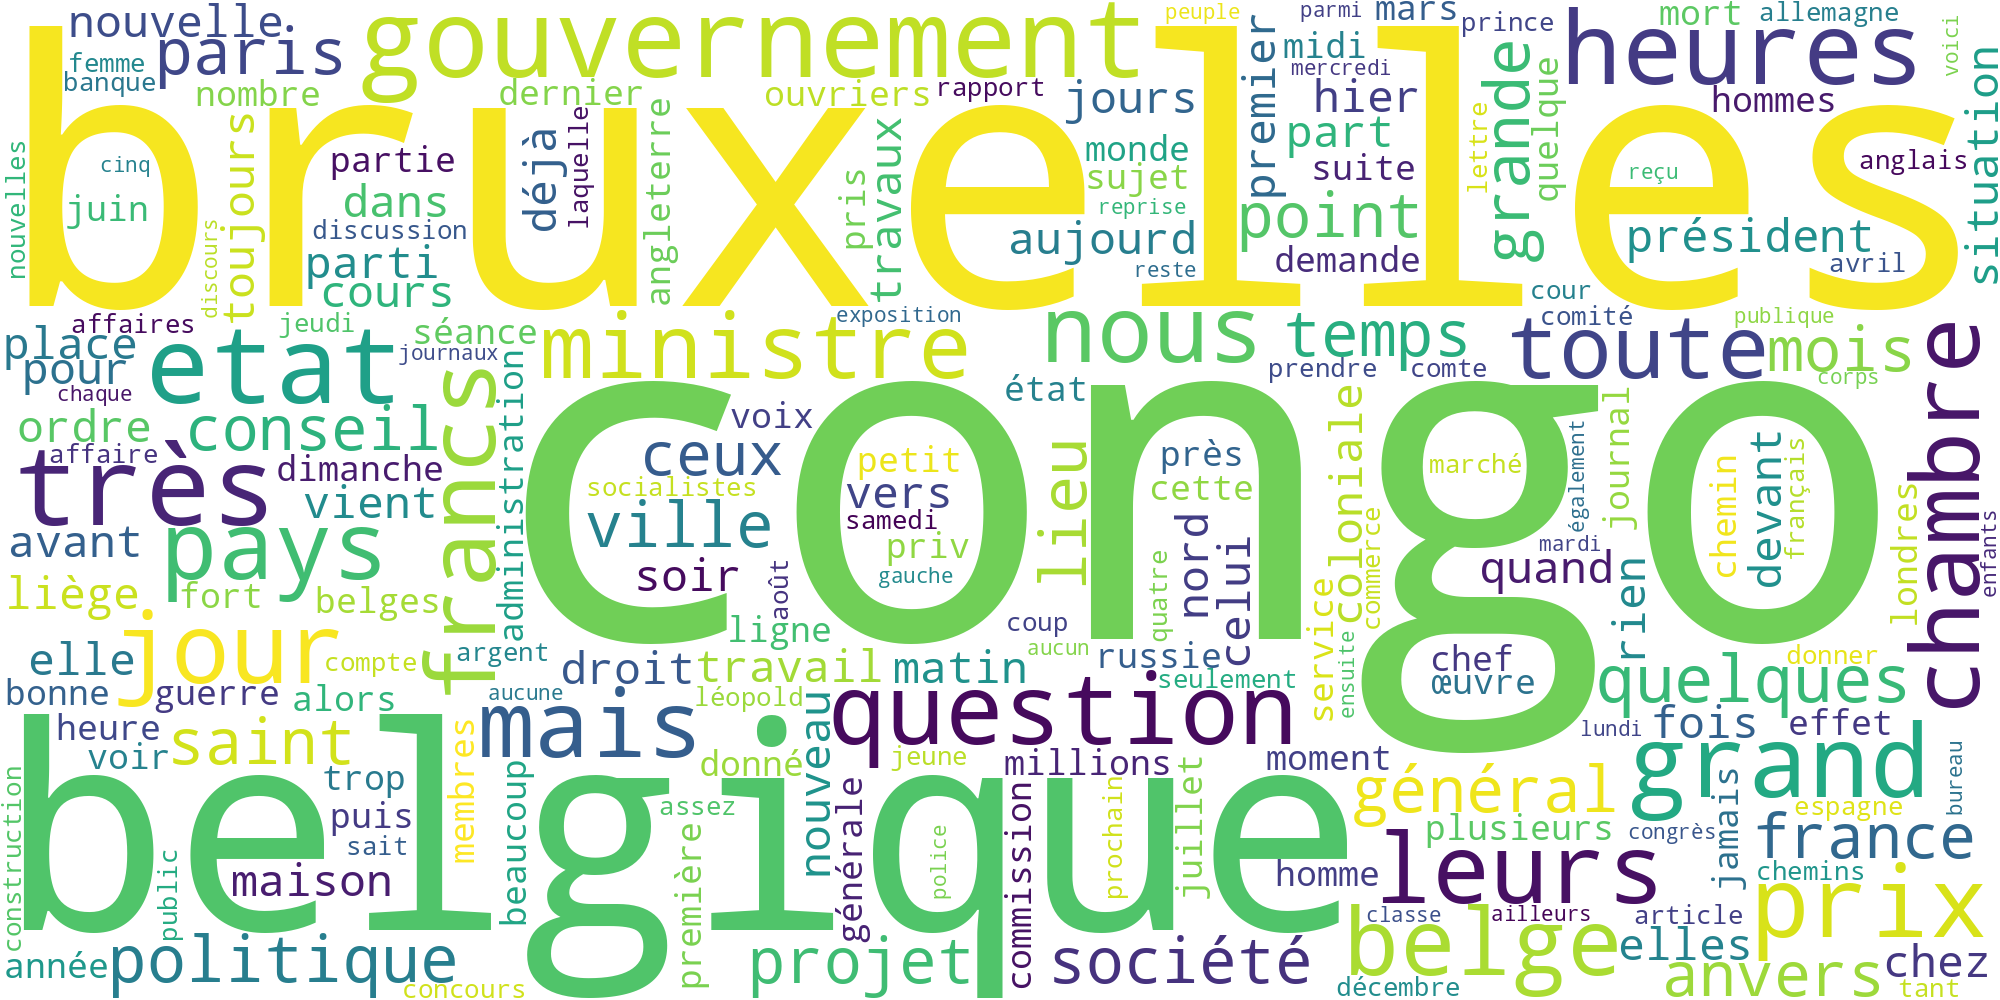

In [23]:
img = '../../data/corpus'
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(freq)
cloud.to_file(os.path.join(img, f"corpus.png"))
Image(filename=os.path.join(img, f"corpus.png"))